In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
# # Calculate the crop percentages
# crop_top_percent = 0.13  # 13% from the top
# crop_bottom_percent = 0.13  # 13% from the bottom
# crop_left_percent = 0.28  # 28% from the left
# crop_right_percent = 0.28  # 28% from the right

In [ ]:
# import cv2
# from PIL import Image
# import pandas as pd

In [ ]:

# DATADIR = '/content/drive/MyDrive/Computer_vision_projects/Pistachio_classification'
# CATEGORIES = ['Kirmizi_Pistachio', 'Siirt_Pistachio']
# SAVE_DIRECTORY = '/content/drive/MyDrive/Computer_vision_projects/Pistachio'
# SAVE_CATEGORIES = ['kirmizi', 'siirt']

# for i in range(2):
#   class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
#   path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
#   for img in os.listdir(path):
#     img_array = imread(os.path.join(path, img))

#     # Get the dimensions of the image
#     height, width = img_array.shape[:2]

#     # Calculate the pixel values for cropping
#     crop_top = int(height * crop_top_percent)
#     crop_bottom = int(height * (1 - crop_bottom_percent))
#     crop_left = int(width * crop_left_percent)
#     crop_right = int(width * (1 - crop_right_percent))

#     # Crop the region of interest (ROI) from the original image
#     object_image = img_array[crop_top:crop_bottom, crop_left:crop_right]

#     # Resize image
#     Resize_image = Image.fromarray(np.array(object_image))
#     Resize_image = Resize_image.resize((224,224))

#     # set the path
#     image_path1 = os.path.join(SAVE_DIRECTORY, SAVE_CATEGORIES[i])
#     image_path2 = os.path.join(image_path1, img)

#     Resize_image.save(image_path2)
#     # cv2.imwrite(image_path2, Resize_image.astype(np.uint8))



In [ ]:

# to flatten an array - a.flatten() where a is a numpy arrayy
target = []
image = []
flat_data = []

DIRECTORY = '/content/drive/MyDrive/Computer_vision_projects/Pistachio'
CATEGORIES = ['kirmizi', 'siirt']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DIRECTORY, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    flat_data.append(img_array.flatten())
    target.append(i)

flat_data = np.array(flat_data)
targets = np.array(target)


In [ ]:
import pandas as pd
flat_data = pd.DataFrame(flat_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, targets, test_size = 0.2, stratify = target, random_state = 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = ['Kirmizi', 'Shiirt']
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

def evaluate(model, X, y_true, y_pred):

  # classification report
  print(classification_report(y_true, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  print("CONFUSION MATRIX: \n", plot_confusion_matrix(cm))

  # Accuracy score
  accuracy = accuracy_score(y_true, y_pred)
  print("ACCURACY: ", accuracy)

  # Recall Score
  recall = recall_score(y_true, y_pred)
  print("RECALL: ", recall)

  # Assuming y_true contains the ground truth labels and y_pred_prob contains the predicted probabilities

  y_probs = model.predict_proba(X)[:, 1]

  # Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
  fpr, tpr, thresholds = roc_curve(y_true, y_probs)

  # Compute the AUC (Area Under the Curve)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  # Plotting the Precision-Recall curve
  precision, recall, thresholds_pr = precision_recall_curve(y_true, y_probs)
  plt.plot(recall, precision)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()



In [ ]:
!pip install simple_colors

In [ ]:
from simple_colors import *
def error_metrics_record(model,y_train, y_train_pred, y_test, y_test_pred, x_test, x_train):
  print('------------------------------------------------------')
  print('------------------------------------------------------')
  print(red('TRAIN DATA EVALUATION', 'bold'))
  evaluate(model, x_train, y_train, y_train_pred)
  print('------------------------------------------------------')
  print(red('TEST DATA EVALUATION', 'bold'))
  evaluate(model, x_test, y_test, y_test_pred)
  print('------------------------------------------------------')
  print('------------------------------------------------------')

In [ ]:
from sklearn.metrics import classification_report

def results(model, X_test, X_train, y_train_, y_test_):
    # Prediction of values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # evaluation
    error_metrics_record(model,y_train_, y_train_pred, y_test_, y_test_pred, X_test, X_train)

# Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 25, 'oob_score': True}
Best Score:  0.9150545171339564
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1065
           1       0.96      1.00      0.98       536

    accuracy                           0.98      1601
   macro avg       0.98      0.99      0.98      1601
weighted avg       0.98      0.98      0.98      1601



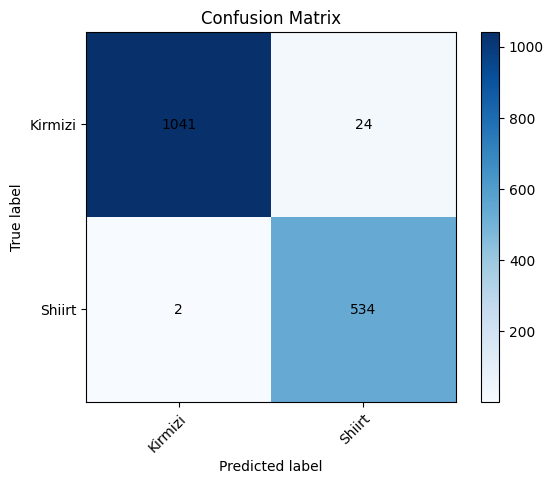

CONFUSION MATRIX: 
 None
ACCURACY:  0.9837601499063086
RECALL:  0.996268656716418


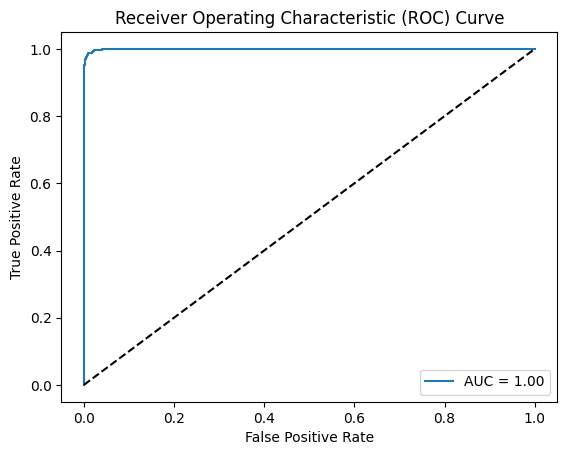

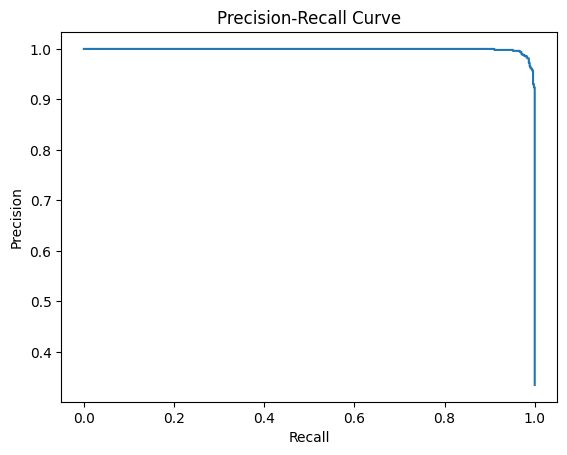

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       267
           1       0.85      0.83      0.84       134

    accuracy                           0.90       401
   macro avg       0.88      0.88      0.88       401
weighted avg       0.89      0.90      0.89       401



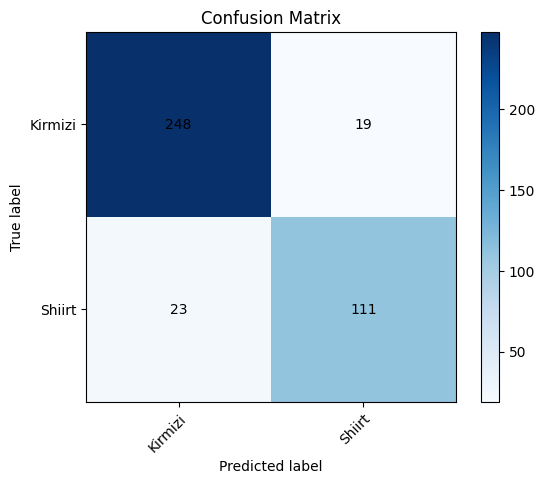

CONFUSION MATRIX: 
 None
ACCURACY:  0.8952618453865336
RECALL:  0.8283582089552238


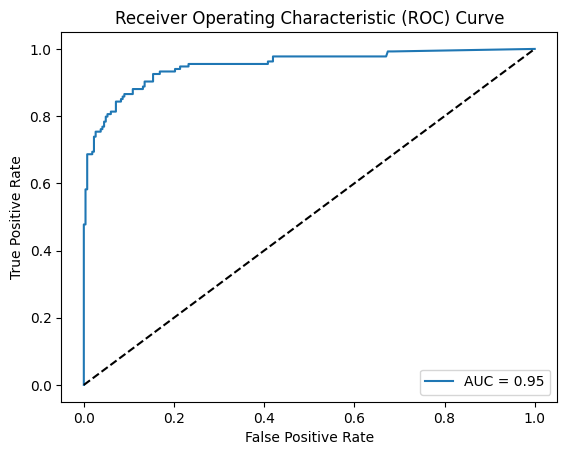

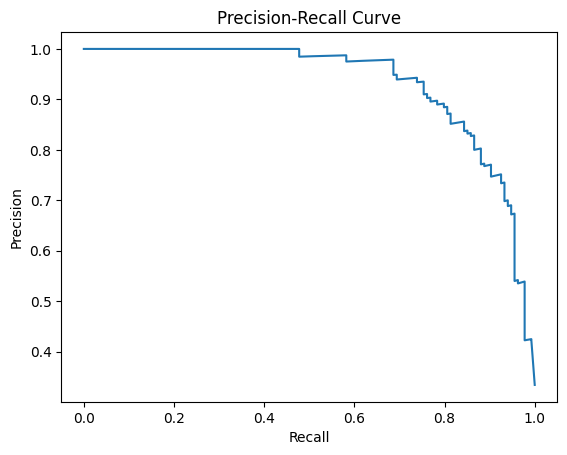

------------------------------------------------------
------------------------------------------------------
None


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Random Forest Classifier - Machine Learning Model
rfc=RandomForestClassifier(n_estimators=15, n_jobs=-1)
param_grid = {
    'max_depth': [ 5, 7],                      # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    # 'min_samples_leaf': [1, 2, 3],               # Minimum number of samples required at a leaf node
    'max_features': ['auto'],   #, 'sqrt', 'log2' # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'],
    'oob_score': [True],
    'n_estimators': [25],
    'class_weight': ['balanced', 'balanced_subsample']
}


# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtain the best values and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluation of model
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
print(results(grid_search, X_test, X_train, y_train, y_test))




------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1065
           1       1.00      0.99      1.00       536

    accuracy                           1.00      1601
   macro avg       1.00      1.00      1.00      1601
weighted avg       1.00      1.00      1.00      1601



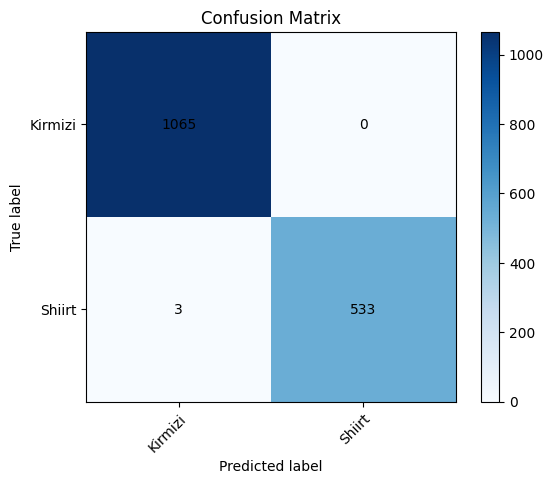

CONFUSION MATRIX: 
 None
ACCURACY:  0.9981261711430356
RECALL:  0.9944029850746269


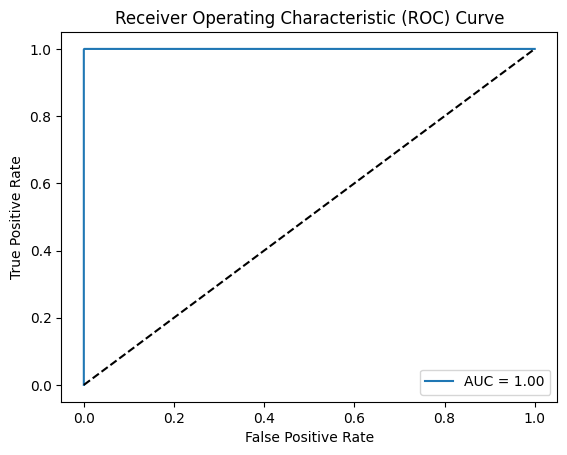

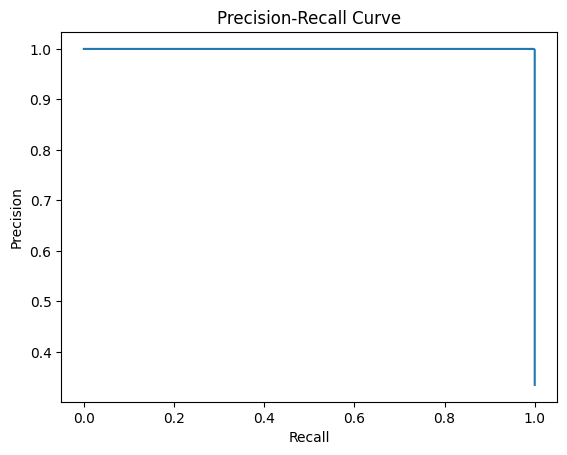

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       267
           1       0.93      0.80      0.86       134

    accuracy                           0.91       401
   macro avg       0.92      0.88      0.90       401
weighted avg       0.91      0.91      0.91       401



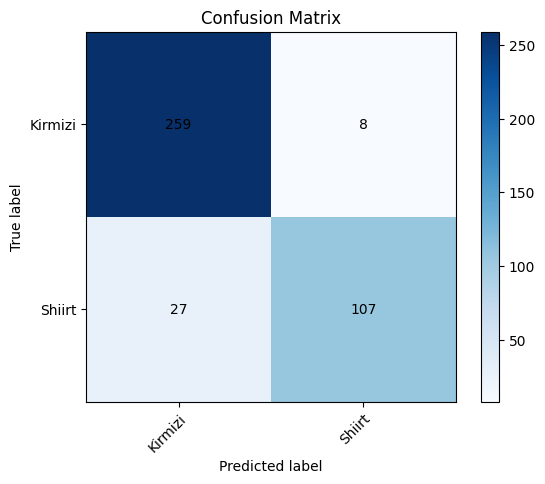

CONFUSION MATRIX: 
 None
ACCURACY:  0.912718204488778
RECALL:  0.7985074626865671


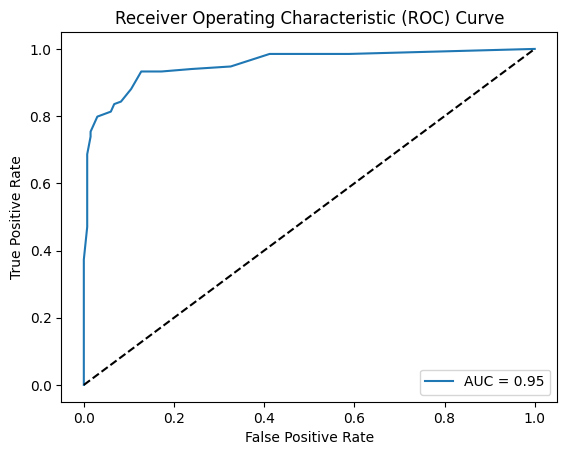

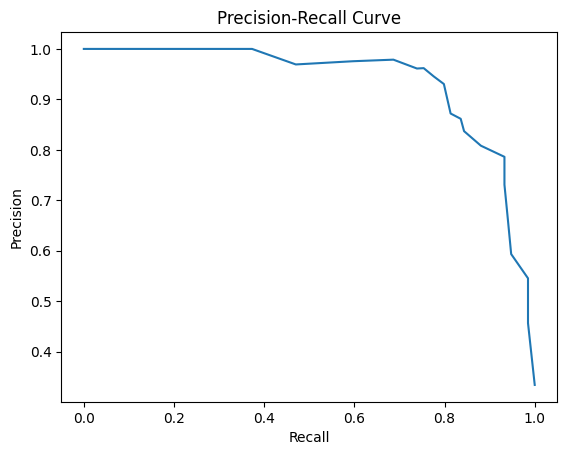

------------------------------------------------------
------------------------------------------------------
None


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20, criterion = 'entropy', class_weight = 'balanced')
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(results(rfc, X_test, X_train, y_train, y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Generate a synthetic classification dataset
# X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual classifier models
classifier1 = DecisionTreeClassifier()
classifier2 = KNeighborsClassifier()
classifier3 = LogisticRegression()

# Create the VotingClassifier
voting_classifier = VotingClassifier([('dt', classifier1), ('knn', classifier2), ('lr', classifier3)])

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

y_test_pred = voting_classifier.predict(X_test)
y_train_pred = voting_classifier.predict(X_train)
# print(results(voting_classifier, X_test, X_train, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


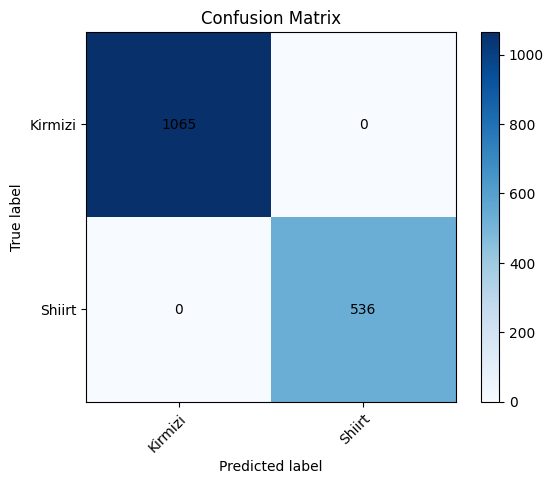

None
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1065
           1       1.00      1.00      1.00       536

    accuracy                           1.00      1601
   macro avg       1.00      1.00      1.00      1601
weighted avg       1.00      1.00      1.00      1601



In [ ]:
print(plot_confusion_matrix(confusion_matrix(y_train_pred, y_train)))
print(classification_report(y_train_pred, y_train))

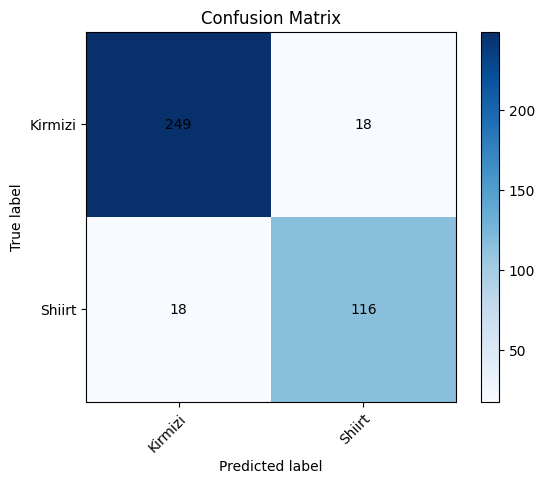

None
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       267
           1       0.87      0.87      0.87       134

    accuracy                           0.91       401
   macro avg       0.90      0.90      0.90       401
weighted avg       0.91      0.91      0.91       401



In [ ]:
print(plot_confusion_matrix(confusion_matrix(y_test_pred, y_test)))
print(classification_report(y_test_pred, y_test))

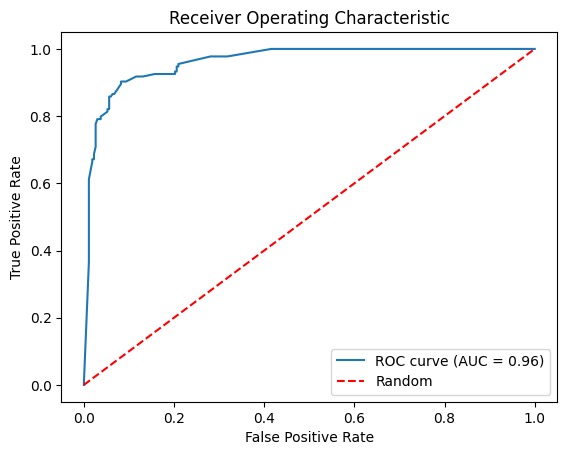

In [ ]:
y_pred = []
for clf in voting_classifier.estimators_:
    if hasattr(clf, "predict_proba"):
        y_pred.append(clf.predict_proba(X_test)[:, 1])
    else:
        y_pred.append(clf.predict(X_test))
y_pred = np.mean(y_pred, axis=0)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

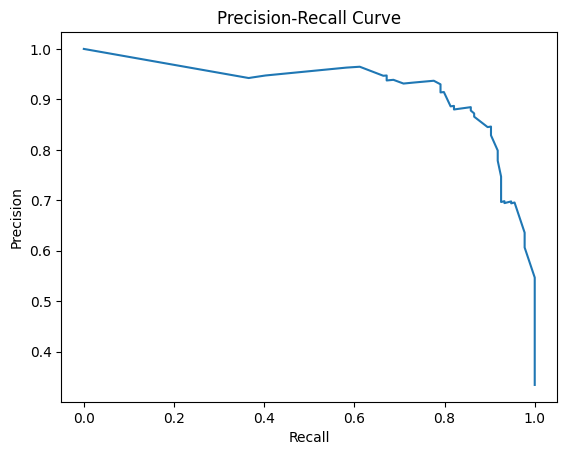

In [ ]:
# Plotting the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

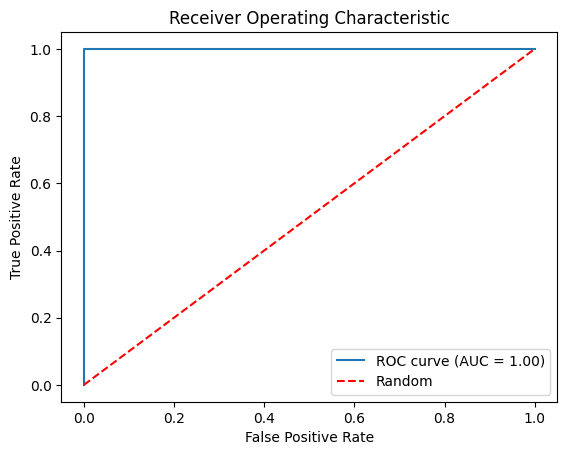

In [ ]:
y_pred = []
for clf in voting_classifier.estimators_:
    if hasattr(clf, "predict_proba"):
        y_pred.append(clf.predict_proba(X_train)[:, 1])
    else:
        y_pred.append(clf.predict(X_train))
y_pred = np.mean(y_pred, axis=0)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

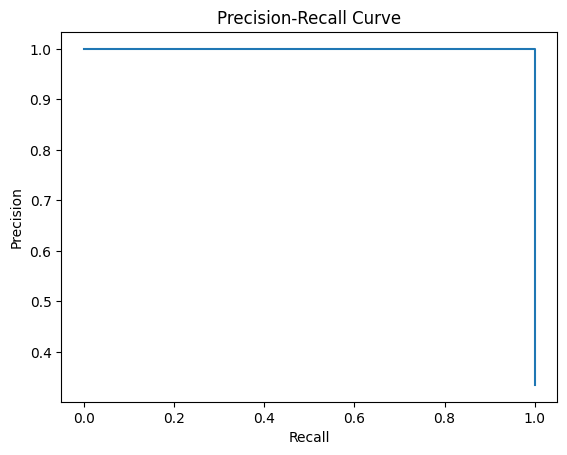

In [ ]:
# Plotting the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()